# setup

In [1]:
import os

if os.getcwd().split('/')[-1] == 'notebooks':
    os.chdir('..')

In [8]:
import torch
import torch.nn as nn

from models.baseline import ResnetBaseline
from runners.train import Runner

In [3]:
import argparse

parser = argparse.ArgumentParser()
parser.add_argument('model_label', type = str, choices = ['code', 'cpsc2018', 'ptbxl', 'ningbo'])
args = parser.parse_args(args = ['code'])

In [4]:
if args.model_label == 'code':
    from dataloaders.code import CODE as DS
    from dataloaders.code import CODEsplit as DSsplit

    epochs = 5
    n_classes = 6

if args.model_label == 'cpsc2018':
    from dataloaders.cpsc2018 import CPSC2018 as DS
    from dataloaders.cpsc2018 import CPSC2018split as DSsplit

    epochs = 30
    n_classes = 8

if args.model_label == 'ptbxl':
    from dataloaders.ptbxl import PTBXL as DS
    from dataloaders.ptbxl import PTBXLsplit as DSsplit

    epochs = 80
    n_classes = 5

if args.model_label == 'ningbo':
    from dataloaders.ningbo import NINGBO as DS
    from dataloaders.ningbo import NINGBOsplit as DSsplit

    epochs = 50
    n_classes = 9

# init

In [5]:
database = DS()
model = ResnetBaseline(n_classes = n_classes)
model = torch.load('output/code/code.pt')

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

838it [00:00, 8371.72it/s]

checking exam_id consistency in idx dict


284928it [00:34, 8360.65it/s]
1650it [00:00, 8248.00it/s]

checking exam_id consistency in idx dict


11528it [00:01, 8274.48it/s]
1649it [00:00, 8242.72it/s]

checking exam_id consistency in idx dict


284928it [00:34, 8346.63it/s]


In [6]:
runner = Runner(device = device, model = model, database = database, split = DSsplit, model_label = args.model_label)

using test ds, H is treated as X


# eval

In [39]:
import matplotlib.pyplot as plt
import numpy as np

from hparams import BATCH_SIZE, NUM_WORKERS
from utils import get_inputs

In [7]:
# runner.eval()

model = model.to(device)
val_dl = torch.utils.data.DataLoader(runner.val_ds, batch_size = BATCH_SIZE, 
                                        shuffle = False, num_workers = NUM_WORKERS)
tst_dl = torch.utils.data.DataLoader(runner.tst_ds, batch_size = BATCH_SIZE, 
                                        shuffle = False, num_workers = NUM_WORKERS)
best_f1s, best_thresholds = runner._synthesis(val_dl, best_thresholds = None)
all_binary_results, all_true_labels, metrics_dict = runner._synthesis(tst_dl, best_thresholds)

100%|██████████| 7/7 [00:04<00:00,  1.50it/s]


In [69]:
error_idx = torch.sum((all_binary_results != all_true_labels).cpu(), axis = 1).bool()
error_idx.shape, torch.sum(error_idx), error_idx

(torch.Size([827]),
 tensor(29),
 tensor([False, False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False, False,
         False, False,  True, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False,  True, False, False,
         False, False, False, False, False, False, False, False,  True, False,
         False, False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False, False,
         False,  Tr

In [32]:
all_binary_results[error_idx]

tensor([[0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 1.],
        [0., 1., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0.],
        [1., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.]], device='cuda:

In [33]:
all_true_labels[error_idx]

tensor([[0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0.],
        [0., 1., 0., 0., 0., 1.],
        [0., 0., 1., 0., 0., 1.],
        [0., 0., 0., 0., 0., 1.],
        [0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]], device='cuda:

In [40]:
tst_dl = torch.utils.data.DataLoader(runner.tst_ds, batch_size = 827, 
                                        shuffle = False, num_workers = NUM_WORKERS)
for batch in (tst_dl):
    # raw, exam_id, label = batch
    raw = batch['X']
    label = batch['y']
    ecg = get_inputs(raw, device = 'cpu')
    label = label.float()

In [41]:
ecg.shape, ecg

(torch.Size([827, 12, 4096]),
 tensor([[[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          ...,
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]],
 
         [[ 0.0000,  0.0000,  0.0000,  ..., -0.4343, -0.4066, -0.3820],
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0038,  0.0159,  0.0255],
          [ 0.0000,  0.0000,  0.0000,  ...,  0.4381,  0.4225,  0.4075],
          ...,
          [ 0.0000,  0.0000,  0.0000,  ...,  1.2055,  1.2020,  1.2030],
          [ 0.0000,  0.0000,  0.0000,  ...,  1.6620,  1.6595,  1.6595],
          [ 0.0000,  0.0000,  0.0000,  ..., -0.7674, -0.7671, -0.7598]],
 
         [[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]

In [42]:
label.shape, label

(torch.Size([827, 6]),
 tensor([[0., 0., 0., 0., 0., 0.],
         [0., 0., 1., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0.],
         ...,
         [0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0.],
         [1., 0., 0., 0., 0., 0.]]))

In [45]:
torch.unique(label == all_true_labels.cpu())

tensor([True])

In [76]:
erros = ecg[error_idx]

for s in range(29):
    erro = erros[s, :, :]
    fig, axs = plt.subplots(6, 2, figsize = (24, 16))
    for ii in range(12):
        i = ii % 6
        j = ii // 6
        axs[i, j].plot(erro[ii, :]);
    plt.savefig('output/fig/erro_{}.png'.format(s));
    plt.close();

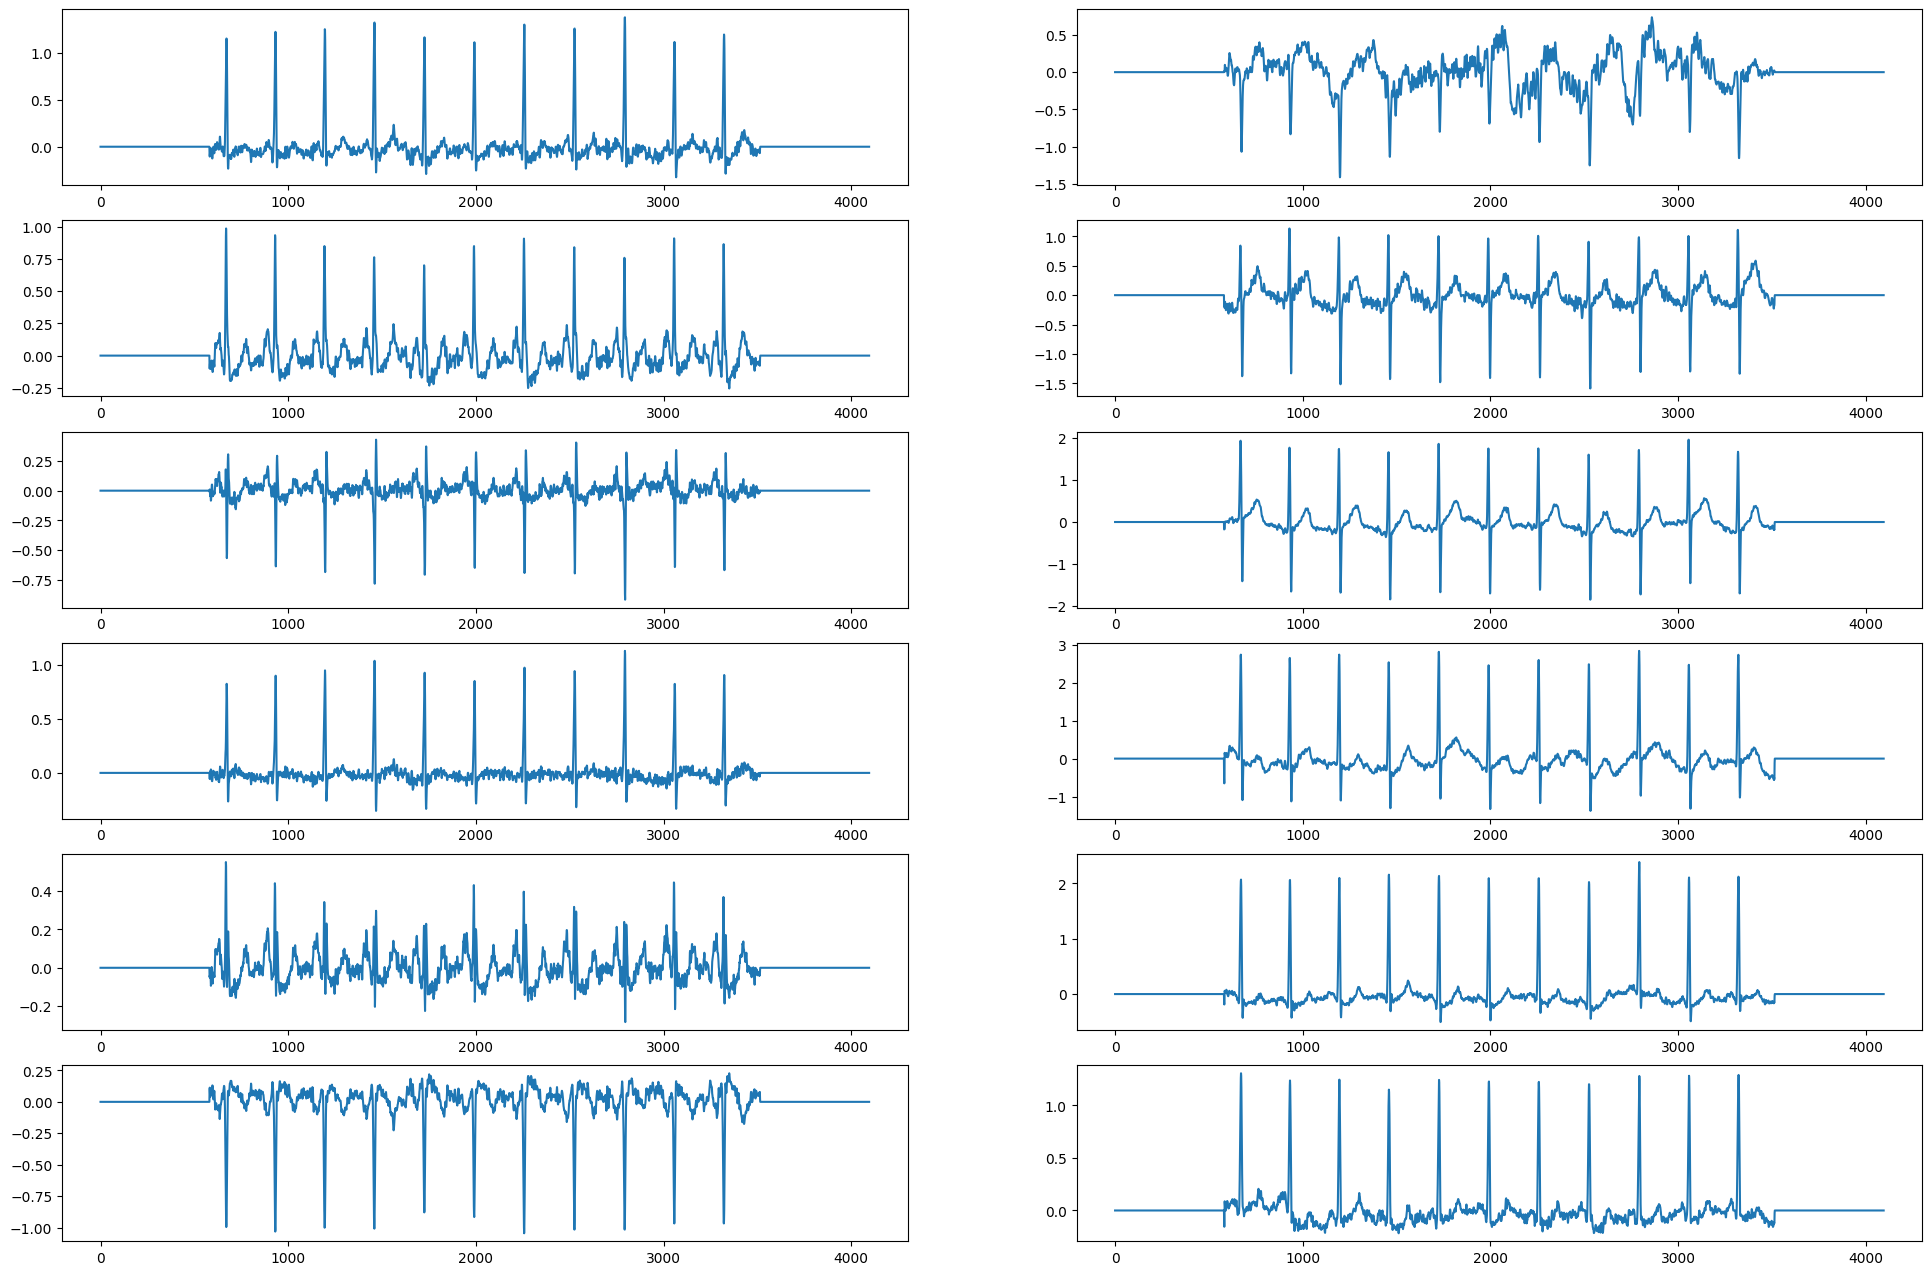

In [73]:
acertos = ecg[~error_idx]

i = 2
acerto = acertos[i, :, :]
fig, axs = plt.subplots(6, 2, figsize = (24, 16))
for ii in range(12):
    i = ii % 6
    j = ii // 6
    axs[i, j].plot(acerto[ii, :]);